

# Classificação de áreas part. 2


## Importando as bibliotecas

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib as plt
#import matplotlib_inline.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import csv as csv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
#from PIL import Image
#from PIL import ImageDraw
import logging
import numpy as np
from scipy.stats import kendalltau, spearmanr, pearsonr
from six import string_types
from six.moves import xrange as range
from sklearn.metrics import confusion_matrix, f1_score, SCORERS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from io import BytesIO

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

## Abrindo o csv


In [1]:
with open('data.csv', newline='') as csvfile:
    readdata = csv.reader(csvfile, delimiter=',')


NameError: name 'csv' is not defined

In [12]:

data = [[]]

x = [] 
y = []

#Com o laço for ocorrerá a conversão de nome para número
with open('data.csv', errors="ignore") as csvfile:
    readdata = csv.reader(csvfile, delimiter=',')
    for row in readdata:
        x.append([row[2],row[3],row[4]])
        if(row[5]=='Agua'):
            y.append(0)
        elif (row[5] =='Solo exposto'):
            y.append(1)
        elif(row[5]=='Floresta'):
            y.append(2)
        y.append (row[5])
x.pop(0);
y.pop(0);


IndexError: pop from empty list

In [9]:
print(x)

[]


In [10]:
#treinando a IA
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print (y_test[0:20])
clf = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)

print(clf)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [21]:
#precisão métricas
from sklearn import metrics
scores = cross_val_score(clf, np.asarray(x), np.asarray(y), cv=6)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

y_pred = clf.predict(X_test)
target_names = [' Agua ', ' Solo exposto ', ' Floresta ']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

print(confusion_matrix(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)



NameError: name 'clf' is not defined

In [15]:
matrix = confusion_matrix(y_test, y_pred)
soma_diagonal = 0

for i in range(len(matrix)):
    soma_diagonal+=matrix[i][i];

soma_horizontal = []
soma_horizontal_value = 0
for i in range(len(matrix)):
    for j in range(len(matrix)):
        soma_horizontal_value +=matrix[i][j]
        
    soma_horizontal += [soma_horizontal_value]
    soma_horizontal_value = 0

soma_vertical = []
soma_vertical_value = 0

for i in range(len(matrix)):
    for j in range(len(matrix)):
        soma_vertical_value += matrix[j][i]
    
        
    soma_vertical +=[soma_vertical_value]
    soma_vertical_value = 0


soma_produto_horizontal_vertical = 0

for i in range(len(soma_horizontal)):
    soma_produto_horizontal_vertical += soma_horizontal[i] * soma_vertical[i];

soma_total = sum(soma_horizontal)


kappa = (((soma_total * soma_diagonal) - soma_produto_horizontal_vertical)/float(((soma_total*soma_total) - soma_produto_horizontal_vertical)))
print("Kappa = %0.3f " % kappa)

arqPorcentagem = open("lulc.csv", "w") 

arqPorcentagem.write("ANO,FLORESTA(hec),ÁGUA,SOLO EXPOSTO \n");
import glob

arquivos = glob.glob('*.png')



for i in range(len(arquivos)):
        arquivos[i] = arquivos[i].translate('.png');
        
print('-->',arquivos)

#arquivos = map(int, arquivos)
#print ('-------',map(arquivos))
#arquivos.sort()




Kappa = 1.000 
--> ['CL_CL_imagem_saida_2.png.png.png', 'CL_CL_recorte_poligono.png.png.png', 'CL_imagem_saida_2.png.png', 'CL_recorte_poligono.png.png', 'imagem_saida_2.png', 'recorte_mesclado.png', 'recorte_poligono.png', 'recorte_shp.png', 'recorte_teste.png', 'recorte_teste1.png', 'recorte_teste2.png']


In [16]:
#Criar primeira imagem de saida com tudo FLORESTA
filenameFirst = 'recorte_teste1.png'
datasetFirst = gdal.Open(filenameFirst, GA_ReadOnly) 
cols_First = datasetFirst.RasterXSize
rows_First = datasetFirst.RasterYSize
bands_First = datasetFirst.RasterCount
driver_First = datasetFirst.GetDriver().LongName
print('Criando primeira imagem de saida');

#Separando as bandas da Imagem Original Passada
band1_First = datasetFirst.GetRasterBand(1)
data1_First = band1_First.ReadAsArray(0, 0, cols_First, rows_First)
band2_First = datasetFirst.GetRasterBand(2)
data2_First = band2_First.ReadAsArray(0, 0, cols_First, rows_First)
band3_First = datasetFirst.GetRasterBand(3)
data3_First = band3_First.ReadAsArray(0, 0, cols_First, rows_First)
rgb_First = np.dstack((data1_First,data2_First,data3_First))

for i in range(rows_First):
    for j in range(cols_First):
        if ((rgb_First[i][j][0] != 255) and (rgb_First[i][j][1] != 255) and (rgb_First[i][j][2] != 255)):
                rgb_First[i][j][0] = 252
                rgb_First[i][j][1] = 158
                rgb_First[i][j][2] = 8

import imageio
                
#---------------------------------------------------------------------------------------------------------------------------------------------------
from scipy import misc
imageio.imwrite(filenameFirst, rgb_First)
#---------------------------------------------------------------------------------------------------------------------------------------------------




Criando primeira imagem de saida


In [17]:

#VARIAVEL CRIADA PARA O CALCULO DE DESMATAMENTO
agua = 0;

#print(arquivos)
for indice_arquivos in range(2):

        filenametiff = 'recorte_teste2.png'
        datasettiff = gdal.Open(filenametiff, GA_ReadOnly) 
        filenameshp = 'recorte_poligono.png'
        #print("ANO = "+str(arquivos[indice_arquivos]))
        datasetshp = gdal.Open(filenameshp, GA_ReadOnly) 

        cols_tiff = datasettiff.RasterXSize
        rows_tiff = datasettiff.RasterYSize
        bands_tiff = datasettiff.RasterCount
        driver_tiff = datasettiff.GetDriver().LongName
        print('Imagem TIFF');
        print(cols_tiff,rows_tiff,bands_tiff,driver_tiff)
        
        cols_shp = datasetshp.RasterXSize
        rows_shp = datasetshp.RasterYSize
        bands_shp = datasetshp.RasterCount
        driver_shp = datasetshp.GetDriver().LongName #Verif
        print('Imagem SHAPEFILE')
        print(cols_shp,rows_shp,bands_shp,driver_shp)

Imagem TIFF
876 742 3 Portable Network Graphics
Imagem SHAPEFILE
2392 2380 4 Portable Network Graphics
Imagem TIFF
876 742 3 Portable Network Graphics
Imagem SHAPEFILE
2392 2380 4 Portable Network Graphics


In [18]:
#Separando as bandas da imagem tiff
band1_tiff = datasettiff.GetRasterBand(1)
data1_tiff = band1_tiff.ReadAsArray(0, 0, cols_tiff, rows_tiff)

band2_tiff = datasettiff.GetRasterBand(2)
data2_tiff = band2_tiff.ReadAsArray(0, 0, cols_tiff, rows_tiff)

band3_tiff = datasettiff.GetRasterBand(3)
data3_tiff = band3_tiff.ReadAsArray(0, 0, cols_tiff, rows_tiff)
#Montando o array com os valores do RGB
rgb_tiff = np.dstack((data1_tiff,data2_tiff,data3_tiff))

#print (rgb_tiff)

#Separando as bandas da imagem shp
band1_shp = datasetshp.GetRasterBand(1)
data1_shp = band1_shp.ReadAsArray(0, 0, cols_shp, rows_shp)

band2_shp = datasetshp.GetRasterBand(2)
data2_shp = band2_shp.ReadAsArray(0, 0, cols_shp, rows_shp)

band3_shp = datasetshp.GetRasterBand(3)
data3_shp = band3_shp.ReadAsArray(0, 0, cols_shp, rows_shp)
#Montando o array com os valores do RGB
rgb_shp = np.dstack((data1_shp,data2_shp,data3_shp))

#print (rgb_shp)

In [19]:
    amostras = [] 
    agua = 0
    arqPorcentagem = open("lulc.csv", "w")
    for i in range(rows_tiff):
        for j in range(cols_tiff):

            if ((rgb_shp[i][j][0] != 255) and (rgb_shp[i][j][1] != 255) and (rgb_shp[i][j][2] != 255)):
                if((rgb_tiff[i][j][0] == 8) and (rgb_tiff[i][j][1] == 4) and (rgb_tiff[i][j][2] == 14)):
                    agua = 1; # Area preservada mudar para 1

                if((rgb_tiff[i][j][0] == 4) and (rgb_tiff[i][j][1] == 57) and (rgb_tiff[i][j][2] == 215)):
                    agua = 0; # Area preservada mudar para 1


                #amostras.append((rgb_shp[i][j][0],rgb_shp[i][j][1],rgb_shp[i][j][2],agua))
                amostras.append((rgb_tiff[i][j][0],rgb_tiff[i][j][1],rgb_tiff[i][j][2]))
                agua = 0
                #print (agua)
    #executa classificacao
    amostras_pred = clf.predict(amostras)
    #print(amostras_pred)

    arq = open("dataset_" + str(arquivos[indice_arquivos]) + ".csv", "w") 
    print(arquivos[indice_arquivos])
    arq.write("X, Y, B1_ORIGINAL, B2_ORIGINAL, B3_ORIGINAL, AREA_PRESERVADA, CLASSIFICACAO\n")

    #--------------------------------------------------------------------------------------------------------------------------------------

CL_CL_recorte_poligono.png.png.png


76

In [20]:
        agua = 0
        cont = 0
        qF = 0;
        qA = 0;
        qSE = 0;
        
        for i in range(rows_tiff):
            for j in range(cols_tiff):
                if ((rgb_shp[i][j][0] != 255) and (rgb_shp[i][j][1] != 255) and (rgb_shp[i][j][2] != 255)):

                    if((rgb_tiff[i][j][0] == 38) and (rgb_tiff[i][j][1] == 115) and (rgb_tiff[i][j][2] == 0)):
                        agua= 1; # Area preservada
                    arq.write("%s, %s, %s, %s, %s, %s, %s \n"% (i,j,rgb_shp[i][j][0],rgb_shp[i][j][1],rgb_shp[i][j][2],agua,amostras_pred[cont]));
                    '''arq.write("%s, %s, %s, %s, %s, %s\n"% (i,j,rgb_shp[i][j][0],rgb_shp[i][j][1],rgb_shp[i][j][2],amostras_pred[cont]));

                    print("------------------------------------------------")
                    print("%s==%s|" % (target_names[0],amostras_pred[cont]))
                    print("%s==%s|" % (target_names[1],amostras_pred[cont]))
                    print("%s==%s|" % (target_names[2],amostras_pred[cont]))
                    target_names = [' Floresta ', ' Agua ', ' Solo_exposto ']'''
                    
                    #FLORESTA
                    if(target_names[0] == amostras_pred[cont]):
                        rgb_Original[i][j][0] = 96
                        rgb_Original[i][j][1] = 232
                        rgb_Original[i][j][2] = 0
                        qF = qF + 1;

                    
                    #AGUA
                    if(target_names[1] == amostras_pred[cont]):
                        rgb_Original[i][j][0] = 4
                        rgb_Original[i][j][1] = 4
                        rgb_Original[i][j][2] = 14
                        qA = qA + 1;

                    #SOLO_EXPOSTO
                    if(target_names[2] == amostras_pred[cont]):
                        rgb_Original[i][j][0] = 230
                        rgb_Original[i][j][1] = 192
                        rgb_Original[i][j][2] = 115
                        qSE = qSE + 1;
                        
                    cont +=1;
                    agua = 0
                    
            '''qTotal = qF + qA + qSE;
            print("Quantidade de Pixel :"+str(qTotal))
            print("Floresta(%) = "+str((qF * 100)/float(qTotal))); 
            print("Agua(%) = "+str((qA * 100)/float(qTotal)));
            print("Solo_exposto(%) = "+str((qSE * 100)/float(qTotal)));'''

In [21]:
            qF = qF * 0.9; 
            if(agua != 0):
                agua = agua - qF;
            qA = qA * 0.9;
            qSE = qSE * 0.9; 
            
            qTotal = qF + qA + qSE;
            print("Quantidade de Pixel : "+str(qTotal))
            print("Floresta(hectares) = "+str(qF)); 
            print("Água = "+str(qA));
            print("Solo Exposto = "+str(qSE));

Quantidade de Pixel : 0.0
Floresta(hectares) = 0.0
Água = 0.0
Solo Exposto = 0.0


<_io.TextIOWrapper name='lulc.csv' mode='w' encoding='cp1252'>


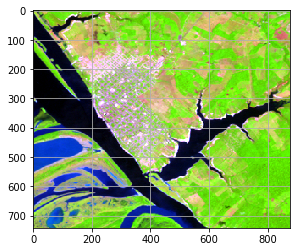

In [22]:
        
        arqPorcentagem.write (str(arquivos[indice_arquivos])+","+str(qF)+","+str(qA)+","+str(qSE)+","+str(agua)+";\n")
    #agua = qF;
        print (arqPorcentagem)
arq.close()
from scipy import misc
imageio.imwrite('CL_'+str(arquivos[indice_arquivos])+'.png', rgb_tiff)	#SEMPRE VAI SER IMAGEM DE SAIDA
imageio.imwrite('imagem_saida_'+str(indice_arquivos+1)+'.png', rgb_tiff)	#SEMPRE VAI SER IMAGEM DE SAIDA
plt.figure(indice_arquivos+1)
plt.imshow(rgb_tiff, interpolation='nearest')

arqPorcentagem.close()
plt.grid()
#plt.show()